<a href="https://colab.research.google.com/github/DanayaDiarra/danaya_data/blob/master/Big_Mart_Sales_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Importing libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import plotly.express as px

##  Data Collection and PreProcessing

In [107]:
data = pd.read_csv("train.csv")

In [108]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
#Rows and Columns
data.shape

(8523, 12)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Categorical features

*   Item_Identifier
*  Item_Fat_Content
*  Item_Type
*  Outlet_Identifier
*  Outlet_Size
* Outlet_Location_Type
* Outlet_Type



## Handling missing values
*  Mean ----> for missing values in numerical columns
*  Mode ----> for missing values in categorical columns




In [111]:
data.isna().sum() # Cheking for missing values

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [112]:
##Item_Weight
data["Item_Weight"].mean()

np.float64(12.857645184135976)

In [113]:
## converting  "Item_Weight" of  DataFrame  to a floating-point number (decimal).
data["Item_Weight"] = data["Item_Weight"].astype(float)

In [114]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())

---------------------------------

In [115]:
## Outlet_Size
data['Outlet_Size'].mode()

,Outlet_Size
0,Medium


In [116]:
data['Outlet_Size'].isna().sum()

np.int64(2410)

In [117]:
# Convert the improperly formatted NaN string to actual np.nan
data['Outlet_Size'].replace(' nan', np.nan)

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [118]:
print(data['Outlet_Size'].isnull().sum())  # Should show the number of NaNs

2410


In [119]:
# Creating a pivot table to replace "Outlet_Size" NaN values based on "Outlet_Type" column
mode_outlet_size = data.pivot_table(values= "Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))

In [120]:
print(mode_outlet_size) # Output of "Mode" based on "Outlet_Type"

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [121]:
# Creating a list of all missing values
missing_val = data['Outlet_Size'].isna()
print(missing_val)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [122]:
# Applying lambda funct to fill the missing val in "missing_val"
data.loc[missing_val, "Outlet_Size"] = data.loc[missing_val, "Outlet_Size"].apply(lambda x: mode_outlet_size)

In [123]:
data.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


## Exploratory Data Analysis
* Statistics of the data

In [124]:
data.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


## Visual Analysis

Numerical features Viz

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.012049  0.024756   
Item_Visibility              -0.012049         1.000000 -0.001315   
Item_MRP                      0.024756        -0.001315  1.000000   
Outlet_Establishment_Year    -0.008301        -0.074834  0.005020   
Item_Outlet_Sales             0.011550        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.008301           0.011550  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


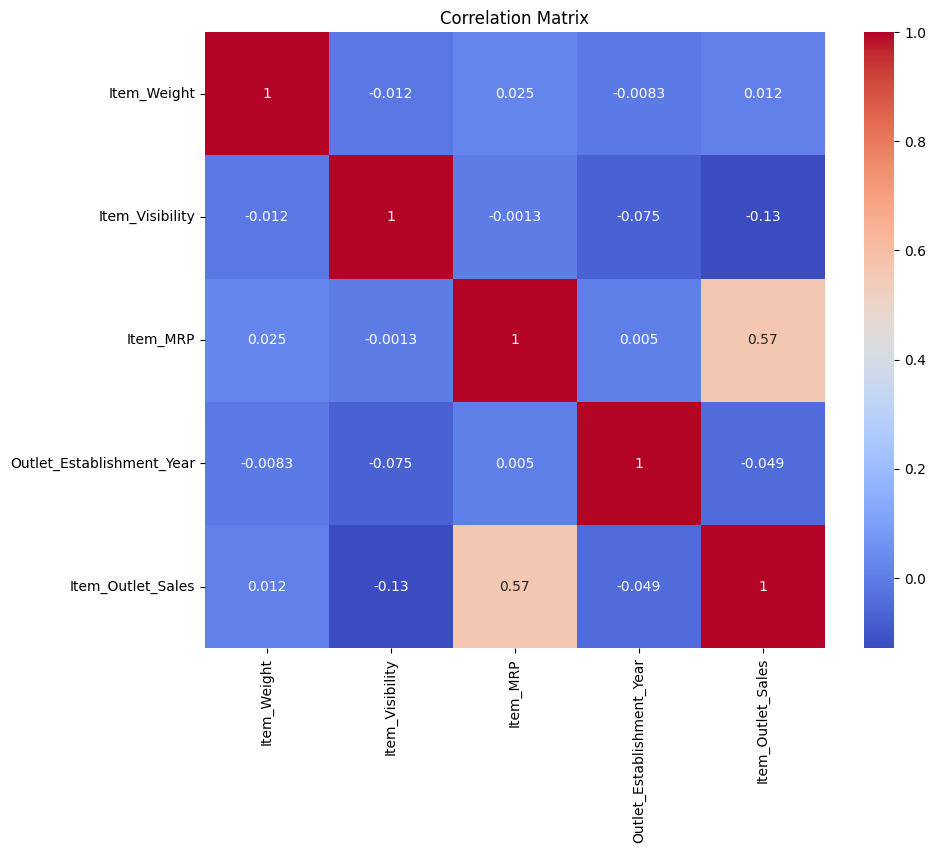

In [125]:
# Calculating correlation for numeric columns
correl = data.select_dtypes(include=[float, int]).corr()
print(correl)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [126]:
fig = px.imshow(correl.round(3),
                text_auto=True,
                color_continuous_scale='RdBu_r',
                aspect='auto',
                title='Correlation Matrix')

fig.show()

<ipython-input-127-8cb94ea469e7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




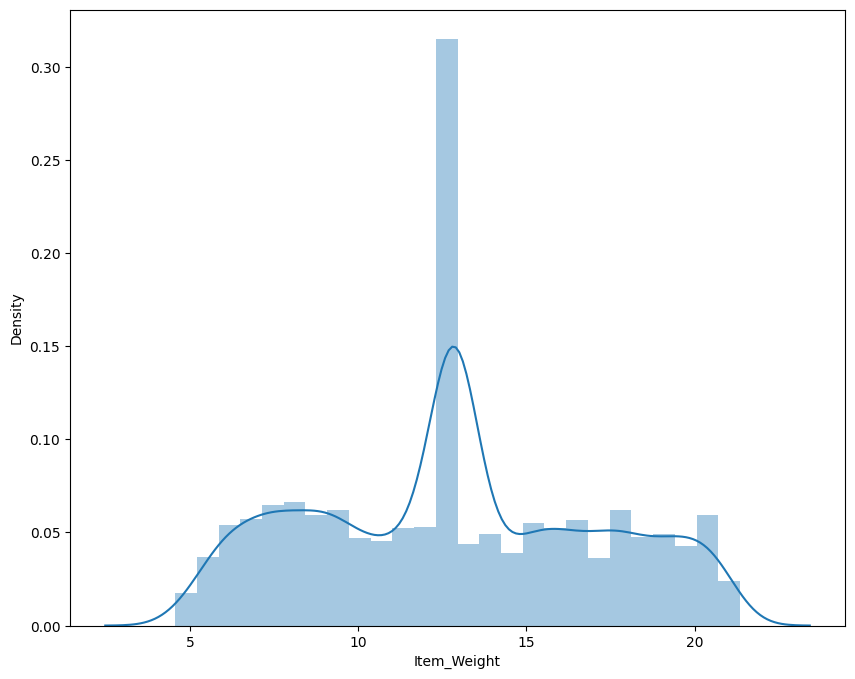

In [127]:
## Item_Weight distribution
plt.figure(figsize = (10, 8))
sns.distplot(data["Item_Weight"])
plt.show()

In [128]:
import plotly.express as px

fig = px.histogram(data, x="Item_Weight", nbins=30, title="Item_Weight Distribution")
fig.update_layout(width=800, height=600)
fig.show()

<ipython-input-129-760618485477>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




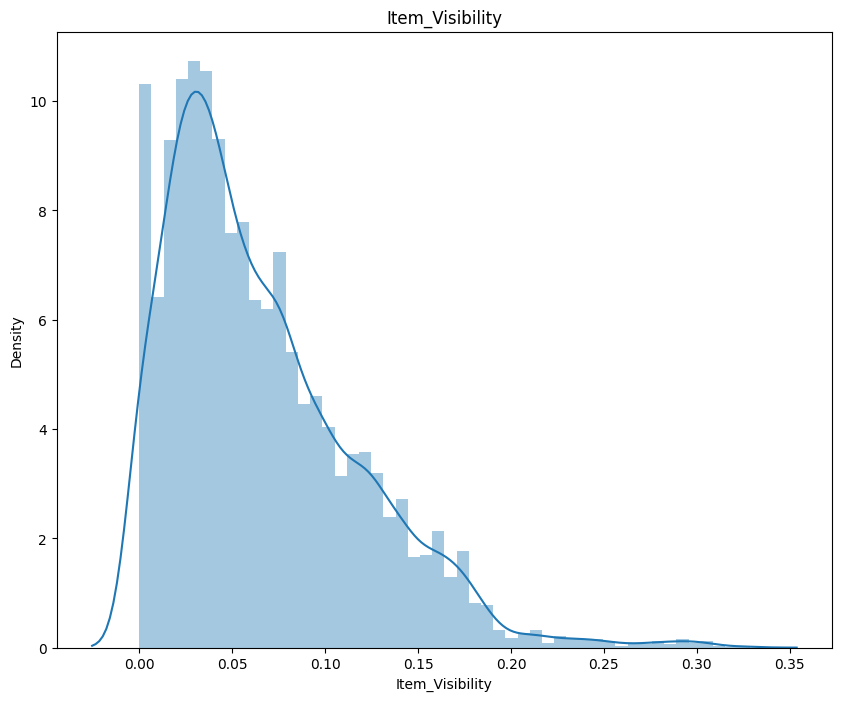

In [129]:
plt.figure(figsize =(10, 8))
sns.distplot(data['Item_Visibility'])
plt.title("Item_Visibility")
plt.show()

In [130]:
fig = px.histogram(data, x="Item_Visibility", nbins=70, title="Item_Visibility Distribution")
fig.update_layout(width=800, height=600)
fig.show()

In [131]:
fig = px.histogram(data, x="Item_MRP", nbins = 50, title = "Item_MRP Distribution")
fig.update_layout(width =900, height = 700)
fig.show()

<ipython-input-132-b4a0419c38d1>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




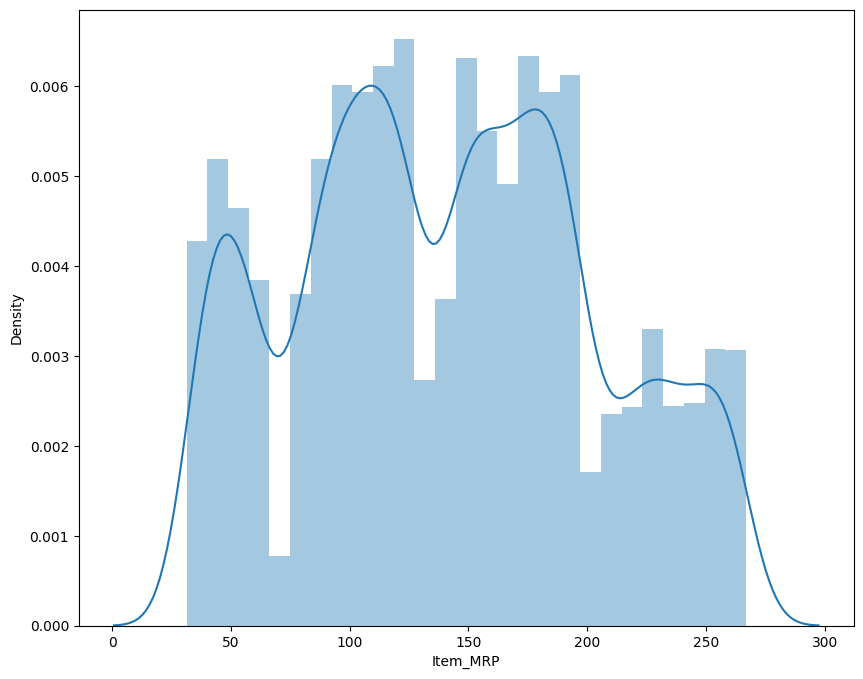

In [132]:
plt.figure(figsize = (10, 8))
sns.distplot(data['Item_MRP'])
plt.show()

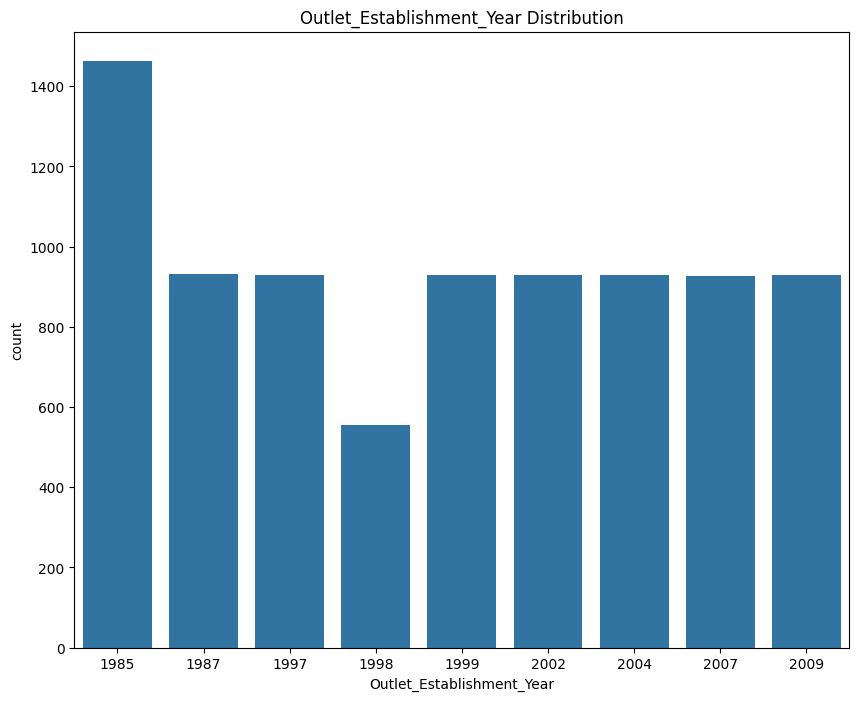

In [133]:
plt.figure(figsize =(10, 8))
sns.countplot(x = "Outlet_Establishment_Year", data = data)
plt.title("Outlet_Establishment_Year Distribution")
plt.show()

In [134]:
# Outlet_Establishment_Year
fig = px.histogram(data, x = "Outlet_Establishment_Year", nbins= 50, title = "Outlet_Establishment_Year Distribution")
fig.update_layout(width = 900, height = 600)
fig.show()

<ipython-input-135-a2342a579e34>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




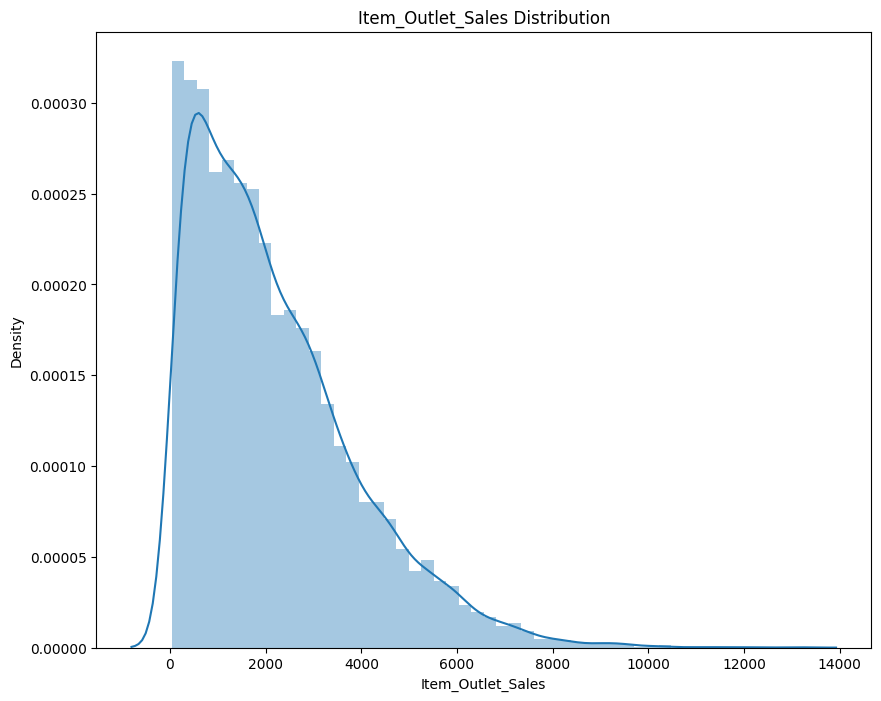

In [135]:
plt.figure(figsize= (10, 8))
sns.distplot(data["Item_Outlet_Sales"])
plt.title("Item_Outlet_Sales Distribution")
plt.show()

In [136]:
fig = px.histogram(data, x = "Item_Outlet_Sales", nbins= 50, title = "Item_Outlet_Sales Distribution")
fig.update_layout(width = 900, height = 700)
fig.show()

Categorical features Viz

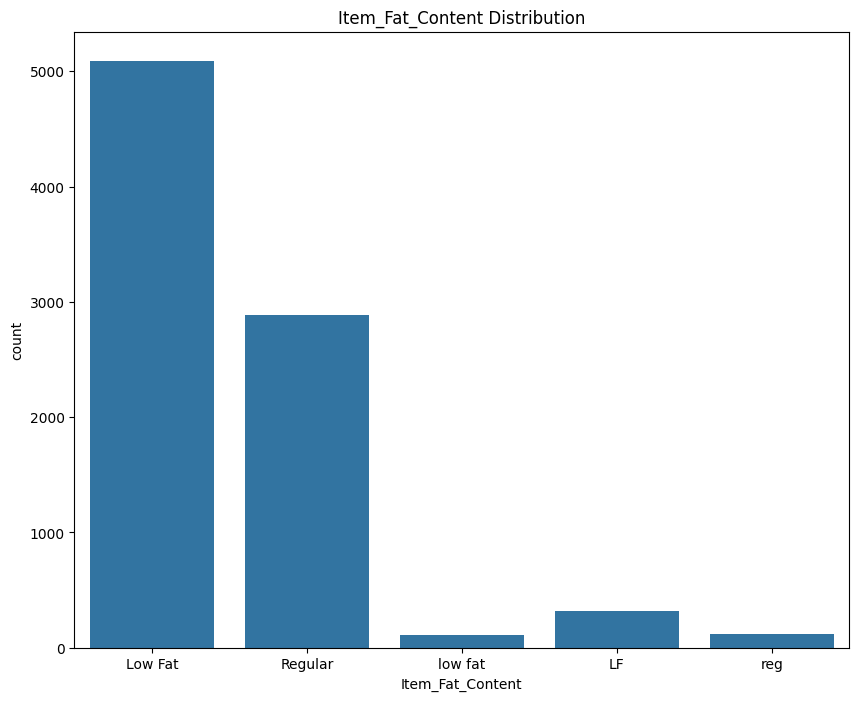

In [137]:
plt.figure(figsize =(10, 8))
sns.countplot(x = "Item_Fat_Content", data = data)
plt.title("Item_Fat_Content Distribution")
plt.show()

In [138]:
# Item Types
fig = px.bar(data_frame=data, x="Item_Type", title="Item_Type Distribution", color_discrete_sequence=['indigo'])
fig.update_layout(width=900, height=700)
fig.show()

In [139]:
data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800


In [140]:
# Outlet_Types
fig = px.bar(data_frame= data, x="Outlet_Type", title = "Outlet Types Distribution", color_discrete_sequence=["indigo"])
fig.update_layout(width=900, height = 700)
fig.show()

# **Data Pre-Preprocessing**

In [141]:
data.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800


In [142]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [143]:
# replacing low fat, LF by "Low Fat" and reg by "Regular"
data.replace({"Item_Fat_Content": {"low fact" : "Low Fat", "LF": "Low Fat", "reg":"Regular"}}, inplace= True)

In [144]:
data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5405
Regular,3006
low fat,112


**Label Encoding**

In [145]:
encoder = LabelEncoder()

In [146]:

# Item_Identifier
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
# Item_Fat_Content
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
# Item_Type
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
# Outlet_Identifier
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

In [147]:
# Outlet_Size(Contains different types of data entries
# -----------------------------------------
# 1_Check for DataFrame entries in the column
is_dataframe = data['Outlet_Size'].apply(lambda x: isinstance(x, pd.DataFrame))
problematic_rows = data[is_dataframe]

print(problematic_rows)


      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
3                1121       19.200                 1         0.000000   
8                 440       16.200                 1         0.016687   
9                 990       19.200                 1         0.094450   
25               1294       13.000                 0         0.099887   
28                350        5.925                 1         0.161467   
...               ...          ...               ...              ...   
8502             1339        8.420                 0         0.070712   
8508             1091       11.350                 1         0.043246   
8509              420        8.100                 0         0.214306   
8514              145       15.000                 1         0.054489   
8519              897        8.380                 1         0.046982   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
3             6  182.0950                  0    

In [148]:
# Replacing DataFrame entries with 'Unknown'
data['Outlet_Size'] = data['Outlet_Size'].apply(
    lambda x: 'Unknown' if isinstance(x, pd.DataFrame) else x
)

In [149]:
# Checking types after cleanup
print(data['Outlet_Size'].apply(type).unique())
# Output should be: [<class 'str'>]

[<class 'str'>]


In [150]:
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

In [151]:
# Outlet_Location_Type
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
# Outlet_Type
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [152]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# **Splitting "Target(Y)" and "Features(X)"**





In [153]:
X = data.drop(columns="Item_Outlet_Sales", axis= 1)
Y = data['Item_Outlet_Sales']

In [154]:
X.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [155]:
Y.head(5)

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


# **Train_Test Plit**

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [157]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# **ML Model Training**

XGBoost Regressor

In [158]:
regressor = XGBRegressor()

In [159]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# **Prediction:**

In [160]:
# Prediction with Training Data
Train_predict = regressor.predict(X_train)
Train_predict

array([2401.0007, 2725.0408, 3424.3662, ..., 3110.8108, 1775.172 ,
       2113.198 ], dtype=float32)

In [161]:
# Prediction with Test Data
Test_predict = regressor.predict(X_test)
Test_predict

array([2681.0903, 2265.8728, 1614.7231, ..., 2520.038 , 1511.9224,
       3311.8794], dtype=float32)

# **Model Evaluation**

In [162]:
#R2 Value Of prediction on Training Data
r2_train = metrics.r2_score(Y_train, Train_predict)


In [163]:

print(f"R2 Value: {r2_train * 100:.2f}%")

R2 Value: 87.62%


In [164]:
# R2 Value on Test Data
r2_test = metrics.r2_score(Y_test, Test_predict)

In [165]:
print(f"R2 Value: {r2_test * 100: .2f}%")

R2 Value:  52.22%


# **Model Visualisation**

In [166]:
import xgboost as xgb
import matplotlib.pyplot as plt

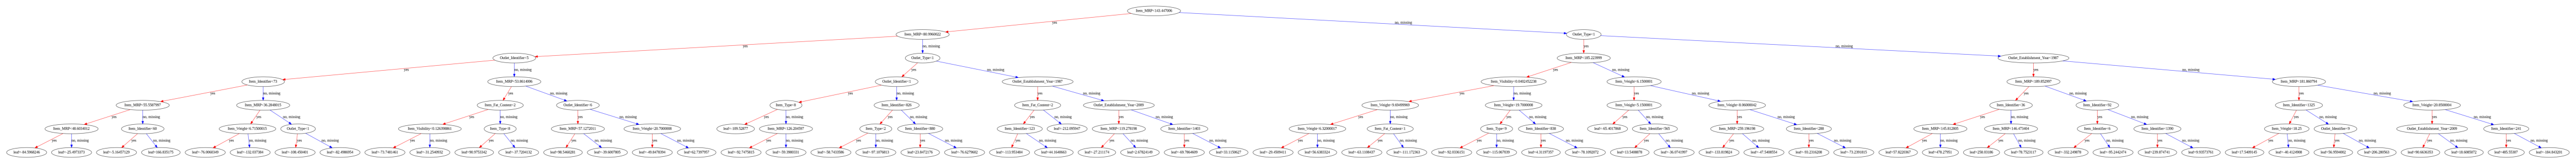

In [167]:
fig, ax = plt.subplots(figsize=(60, 40))
xgb.plot_tree(regressor, num_trees=5, ax=ax)
plt.savefig('large_tree.png', dpi=300, bbox_inches='tight')